[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_4_Learning_Billie_Jean.ipynb)

#4.4 Learning Billie Jean
Let's work with an actual song. In this notebook we'll learn how to use Markov chains to learn patterns from actual songs and generate new material. We will read in music from the song Billi Jean, train a Markov model, and resynthesize Billie Jean using the trained Markov model. Things get weird quickly...

## Step 1: Install the course code repository
Install external libraries and import them into your notebok session

In [1]:
# install external libraries
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!pip install -q pretty_midi
!pip install -q pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
!rm -r mai
!git clone https://github.com/davidkant/mai.git

Cloning into 'mai'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 281 (delta 45), reused 29 (delta 8), pack-reused 185
Receiving objects: 100% (281/281), 12.14 MiB | 11.92 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [2]:
# imports
import mai
import pretty_midi
import random
import matplotlib.pyplot as plt
import copy
import IPython.display

Using TensorFlow backend.


## Step 2: Load a MIDI file
First load in a MIDI file of the song Billie Jean. We are using a Python package called `pretty_midi` to read and manipulate MIDI data. I have provided the MIDI file `Billie_Jean.mid` in the `aim80L` Python package.

In [0]:
# load midi file
midi_data = pretty_midi.PrettyMIDI('mai/resources/midi/Billie_Jean.mid')

## Step 3: Select an instrument to work with

In [0]:
# select instrument to work with
instrument = midi_data.instruments[0]

__note:__ MIDI data often has multiple voices or instruments. with pretty_midi you can access these different instruments through the instruments list, as seen on the last line of the previous cell. in this MIDI file, the first instrument (indexed with a 0 on the line `midi_data.instrument[0]`) is the vocal. the last instrument is the drum. the second to last is the bass. the third to last is the keyboard.

* vocal = `midi_data.instrument[0]`
* drums = `midi_data.instrument[-1]`
* bass = `midi_data.instrument[-2]`
* keys = `midi_data.instrument[-3]`

## Step 4: Extract note pitches
We are going to extract just the pitch information from the vocal melody, turning it into a sequence of numbers representing pitch.

In [0]:
# pitch list
original_music = [note.pitch for note in instrument.notes] # <- don't worry about understanding this line of code just yet

In [6]:
# sanity check 
print original_music

[61, 61, 61, 59, 57, 59, 57, 61, 57, 57, 59, 57, 61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 57, 59, 57, 56, 54, 57, 56, 54, 57, 56, 54, 57, 56, 54, 61, 61, 61, 59, 57, 59, 57, 61, 57, 57, 59, 57, 61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 66, 64, 66, 64, 66, 69, 66, 69, 66, 66, 64, 66, 61, 66, 64, 66, 66, 66, 64, 66, 68, 66, 64, 66, 64, 66, 64, 66, 66, 66, 66, 69, 66, 66, 64, 66, 61, 66, 62, 62, 62, 62, 64, 66, 66, 65, 65, 65, 65, 66, 68, 66, 68, 66, 66, 64, 61, 61, 66, 66, 64, 61, 66, 66, 66, 64, 61, 61, 66, 69, 71, 69, 68, 66, 66, 66, 73, 71, 71, 66, 62, 61, 66, 69, 71, 69, 68, 66, 66, 66, 73, 71, 71, 66, 62, 61, 61, 61, 61, 59, 57, 59, 57, 61, 57, 57, 59, 57, 61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 57, 59, 57, 56, 54, 57, 56, 54, 57, 56, 54, 57, 56, 54, 61, 61, 61, 59, 57, 59, 57, 61, 57, 57, 59, 57, 61, 61, 61, 61, 61, 59, 57,

##Step 5: Learn a Markov model from the vocal melody
Train a Markov model on the sequnce of pitches extracted from the vocal meldoy. **This is where you specify what `order` Markov chain  you'd like to use.**

In [0]:
# what order?
order = 3

# create a markov chain instance
mark = mai.markov.Markov()

# then learn a transition table from data
mark.train(original_music, order=order)

View the transition table

In [8]:
# show length of transition table
len(mark.transitions)

100

In [9]:
# show transition table
mark.transitions

{((54, 54, 56), 54): 12,
 ((54, 54, 57), 59): 2,
 ((54, 56, 54), 54): 10,
 ((54, 56, 54), 66): 2,
 ((54, 57, 56), 54): 6,
 ((54, 57, 59), 57): 2,
 ((54, 61, 61), 61): 2,
 ((54, 66, 64), 66): 2,
 ((56, 54, 54), 56): 12,
 ((56, 54, 54), 57): 2,
 ((56, 54, 57), 56): 6,
 ((56, 54, 61), 61): 2,
 ((56, 54, 66), 64): 2,
 ((57, 56, 54), 54): 4,
 ((57, 56, 54), 57): 6,
 ((57, 56, 54), 61): 2,
 ((57, 57, 59), 57): 4,
 ((57, 59, 57), 56): 2,
 ((57, 59, 57), 61): 12,
 ((57, 61, 57), 57): 4,
 ((57, 61, 59), 57): 4,
 ((57, 61, 61), 61): 4,
 ((59, 57, 56), 54): 6,
 ((59, 57, 59), 57): 8,
 ((59, 57, 61), 57): 4,
 ((59, 57, 61), 59): 4,
 ((59, 57, 61), 61): 4,
 ((61, 57, 57), 59): 4,
 ((61, 59, 57), 56): 4,
 ((61, 59, 57), 59): 8,
 ((61, 61, 59), 57): 8,
 ((61, 61, 61), 59): 8,
 ((61, 61, 61), 61): 9,
 ((61, 61, 66), 66): 11,
 ((61, 61, 66), 69): 4,
 ((61, 66, 62), 62): 2,
 ((61, 66, 64), 66): 2,
 ((61, 66, 66), 64): 20,
 ((61, 66, 66), 66): 4,
 ((61, 66, 69), 71): 8,
 ((62, 61, 61), 61): 1,
 ((62, 61,

##Step 6: Generate a new musical sequence from the trained Markov model
Now the fun part, we generate a new vocal melody using the Markov model learned from the original. Note that this cell first sets the initial Markov state to be the first `order` number of notes from the original melody, then generates a new melody with the same number of notes as the original. **Important: you do not need to edit any code in this cell when changing the order.**

In [0]:
# set the initial state
mark.state = tuple(original_music[0:order])

# store new music here
new_music = list(original_music[0:order])

# chose as many notes as in the original
while len(new_music) < len(instrument.notes)-order:
    
    # choose next state (suppress any errors)
    new_state = mark.choose(suppress_errors=True)
        
    # add it to new music
    new_music += [new_state]

**Note:** If your Markov model produces the error `'Current state not found in transition table'`, you can supress it by passing the value `True` to the argument `supress_errors` in the `mark.choose()` function call. 

In [11]:
# print the new music
print new_music

[61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 57, 59, 57, 61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 57, 57, 59, 57, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 61, 61, 61, 61, 61, 61, 61, 59, 57, 56, 54, 57, 56, 54, 57, 56, 54, 54, 57, 59, 57, 61, 59, 57, 59, 57, 61, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 57, 59, 57, 61, 61, 61, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 56, 54, 57, 56, 54, 57, 56, 54, 57, 56, 54, 61, 61, 61, 59, 57, 59, 57, 61, 61, 61, 59, 57, 56, 54, 61, 61, 61, 59, 57, 59, 57, 61, 59, 57, 59, 57, 61, 61, 61, 59, 57, 59, 57, 56, 54, 57, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 56, 54, 54, 57, 59, 57, 56, 54, 54, 56, 54, 66, 64, 66, 69, 66, 69, 66, 66, 64, 61, 61, 66, 66, 66, 73, 71, 71, 66, 62, 61, 66, 69, 71, 69, 68, 66, 66, 66, 69, 66, 69, 66, 66, 64, 61, 66, 66, 64, 61, 66, 66, 66,

### Plot it
Let's also plot them. Here the the original melody (in blue) and the new melody (in green) are on the same plot.

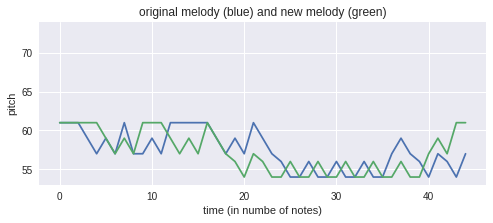

In [12]:
# number of notes to to plot
num_notes = 45

# plot original melody and new melody
plt.figure(figsize=(8,3))
plt.plot(original_music[0:num_notes])
plt.plot(new_music[0:num_notes])
plt.ylim([min(original_music)-1, max(original_music)+1])
plt.xlabel('time (in numbe of notes)')
plt.ylabel('pitch')
plt.title("original melody (blue) and new melody (green)");

##Step 7 Resynthesis: just the solo voice
We'll start by resynthesizing the altered voice alone. We'll create and listen to a new MIDI file that contains only the vocal part and none of the other instruments. Since we've only manipulated pitch, we'll use the rhythm from the original vocal line.

In [0]:
# loop through original notes and change the pitch
for i,new_pitch in enumerate(new_music):
    instrument.notes[i].pitch = new_pitch
    
# create a new solo voice MIDI object
midi_data_voice = pretty_midi.PrettyMIDI()

# and add our instrument to it
midi_data_voice.instruments.append(instrument)

### Sound playback in the browser 
> (1.) In order to hear anything, we need to first convert MIDI to audio (another word for sound). MIDI is just instructions for making sound --- it's not actual sound... --- so we need to use a synthesizer to turn it into sound. This may take a few moments...

In [0]:
# synthesize midi to audio
x = midi_data_voice.fluidsynth(fs=22050)

> (2.) Now we can listen using the notebook audio player. **Note:** this cell will time out if the audio is too large! I recommend playing back smaller segments of music at a time. Use the `start` and `length` values to select the start time and length of the playback segment. Time is specified in seconds. Here are some useful times:
* voice starts at `start = 27`
* bass starts at `start = 5`
* keys starts at `start = 19`
* drums starts at `start = 0`


**Warning!** Turn the volume down before you hit play b/c sometimes the player makes loud static --- for instance, if you play back a segement of audio that is silent

In [15]:
start = 27 # time in seconds
length = 12 # time in seconds
IPython.display.Audio(x[start*22050:(start+length)*22050], rate=22050) # don't worry about understanding the syntax here

You can skip around in the song by changing the `start` and `length` values in the above cell. **Note:** you do not need to re-execute the cell `# synthesize midi to audio` in order to change the `start` and `length` values.

### Download
This cell is not required, but you may download your MIDI file for playback on your computer. Don't forget to change the name each time to indicate the instrument and Markov chain order!

In [0]:
# specify filename here
filename = 'New_Jean-Voice-Order4.mid'

# write file and download it
from google.colab import files
midi_data_voice.write(filename) 
files.download(filename)

##Step 8: Resynthesis: all instruments
Now let's resynthesize the entire band. In this section we'll create a new MIDI file that contains all of the instruments with the original vocal replaced by our new vocal line. 

In [0]:
# loop through original notes and change the pitch
for i,new_pitch in enumerate(new_music):
    instrument.notes[i].pitch = new_pitch

### Playback in browser 
> (1.) First convert MIDI to audio

In [0]:
# synthesize midi to audio
x = midi_data.fluidsynth(fs=22050)

> (2.) Then use the browser audio player to listen. **Remember:** the above cell in which we synthesis MIDI to audio can take a while. You can skip around in the cell below by chaning the `start` and `length` values without having to resynthesize MIDI to audio each time.



In [19]:
start = 0 # time in seconds
length = 60 # time in seconds
IPython.display.Audio(x[start*22050:(start+length)*22050], rate=22050) # don't worry about this line of code

## Here's the fun part
Before moving on to step 8, loop back to step 3 and try a few other instruments. Try different Markov orders as well!

In [0]:
# specify filename here
filename = 'New_Jean-ALL.mid'

# write file and download it
from google.colab import files
midi_data.write(filename) 
files.download(filename)